In [15]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as pl

from revrand.basis_functions import RandomRBF, RandomLaplace, RandomCauchy

In [57]:
# Settings
N = 1000
nbases = 1000
lenscale = 1.0

# Data
x = np.zeros((N, 1))
y = np.linspace(-8, 8, N)[:, np.newaxis]

In [63]:
# Kernel functions

def dist(power=2):
    return (np.abs((x - y)**power)).sum(axis=1)

# RBF
def kern_rbf(lenscale=1.):
    return np.exp(- dist() / (2 * lenscale**2))

# Cauchy
def kern_cau(lenscale=1.):
    return 1. / (1 + dist() / lenscale**2)

# Laplace
def kern_lap(lenscale=1.):
    return np.exp(- dist(power=1) / lenscale)


In [67]:
# Basis functions
rbf = RandomRBF(Xdim=1, nbases=nbases)
cau = RandomCauchy(Xdim=1, nbases=nbases)
lap = RandomLaplace(Xdim=1, nbases=nbases)

def basis2kern(basis):
    return (basis(x, lenscale) * basis(y, lenscale)).sum(axis=1)


In [68]:
# Evaluate kernels and bases
k_rbf = kern_rbf(lenscale)
b_rbf = basis2kern(rbf)

k_cau = kern_cau(lenscale)
b_cau = basis2kern(cau)

k_lap = kern_lap(lenscale)
b_lap = basis2kern(lap)


NameError: name 'exp' is not defined

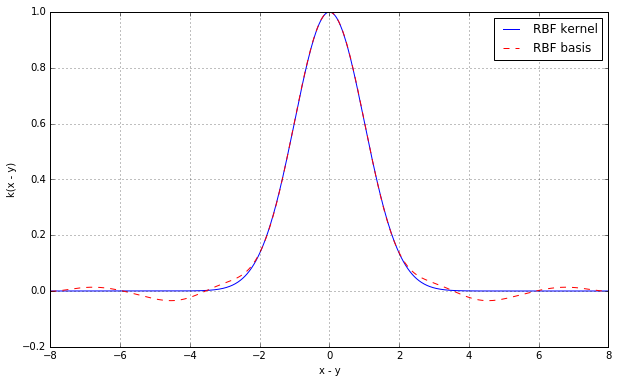

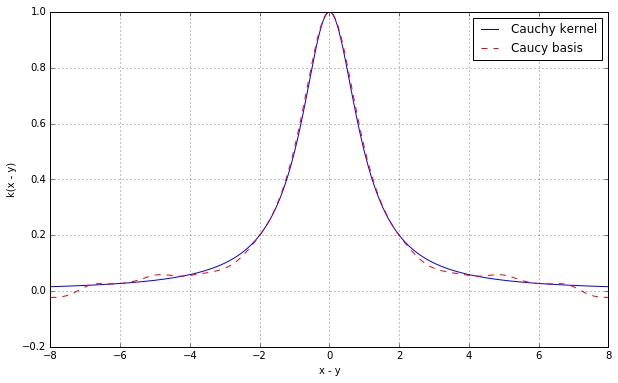

In [66]:
# Plot the kernel functions
def plotkern(k1, k2, k1_label=None, k2_label=None):
    pl.figure(figsize=(10, 6))
    pl.plot(y.flatten(), k1, 'b', label=k1_label)
    pl.plot(y.flatten(), k2, 'r--', label=k2_label)
    pl.grid(True)
    pl.xlabel('x - y')
    pl.ylabel('k(x - y)')
    pl.legend()
    pl.show()
    
plotkern(k_rbf, b_rbf, 'RBF kernel', 'RBF basis')
plotkern(k_cau, b_cau, 'Cauchy kernel', 'Caucy basis')